In [104]:
'''
Curso : Analisis de Datos con Python
Sesion : 3
Tema  : Desarrollo de modelos
Fecha : 10/01/2026
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
file_path = 'dataset/autos_sin_nan.csv'
df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [106]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [107]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [108]:
df.dropna(axis=0, inplace=True)

In [109]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

## 1.- Regresión Simple

#### Ecuación de regresión simple 

- $ y = b_0  + b_1x + error $

- $ \hat{y} = b_0  + b_1x$

##### Error

- $ error = y - \hat{y} $

##### Concluimos
- $ y = \hat{y} + error $

### Seleccionando variables, hallando matriz de correlación y graficando histogramas

In [110]:
v_num = df.select_dtypes(["float64", "int64"])
v_num = list(v_num.columns)
v_num

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'diesel',
 'gas']

In [111]:
df[v_num].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.453423,-0.533112,-0.359883,-0.242821,-0.539407,-0.226121,-0.055329,-0.142125,-0.013520,-0.180275,0.090778,0.229436,0.004688,0.073359,-0.076420,0.021612,-0.192544,0.192544
normalized-losses,0.453423,1.000000,-0.046971,0.027234,0.090056,-0.362499,0.107034,0.147862,-0.030152,0.056054,-0.112288,0.226654,0.215903,-0.208695,-0.166772,0.138183,0.223308,-0.096487,0.096487
wheel-base,-0.533112,-0.046971,1.000000,0.876945,0.821427,0.607417,0.790205,0.592517,0.493941,0.163725,0.248383,0.381984,-0.351925,-0.496565,-0.566948,0.591956,0.517050,0.305889,-0.305889
length,-0.359883,0.027234,0.876945,1.000000,0.857249,0.522367,0.882091,0.698626,0.608496,0.136850,0.156926,0.583073,-0.280397,-0.686142,-0.715124,0.689466,0.690579,0.212484,-0.212484
width,-0.242821,0.090056,0.821427,0.857249,1.000000,0.351127,0.862835,0.739543,0.543859,0.210495,0.188331,0.604099,-0.252116,-0.639692,-0.684550,0.744176,0.685663,0.251112,-0.251112
height,-0.539407,-0.362499,0.607417,0.522367,0.351127,1.000000,0.354085,0.100518,0.199490,-0.084755,0.269773,-0.031489,-0.270020,-0.128523,-0.181670,0.182407,0.111120,0.279063,-0.279063
curb-weight,-0.226121,0.107034,0.790205,0.882091,0.862835,0.354085,1.000000,0.858968,0.646918,0.193575,0.153952,0.750749,-0.281231,-0.766146,-0.808146,0.828483,0.809512,0.228445,-0.228445
engine-size,-0.055329,0.147862,0.592517,0.698626,0.739543,0.100518,0.858968,1.000000,0.601384,0.265626,0.017246,0.825377,-0.227577,-0.712693,-0.734062,0.889265,0.814696,0.076032,-0.076032
bore,-0.142125,-0.030152,0.493941,0.608496,0.543859,0.199490,0.646918,0.601384,1.000000,-0.049606,-0.000044,0.579114,-0.276668,-0.591597,-0.598455,0.544375,0.574286,0.055927,-0.055927
stroke,-0.013520,0.056054,0.163725,0.136850,0.210495,-0.084755,0.193575,0.265626,-0.049606,1.000000,0.191776,0.139409,-0.067852,-0.050971,-0.052345,0.107893,0.065893,0.240193,-0.240193


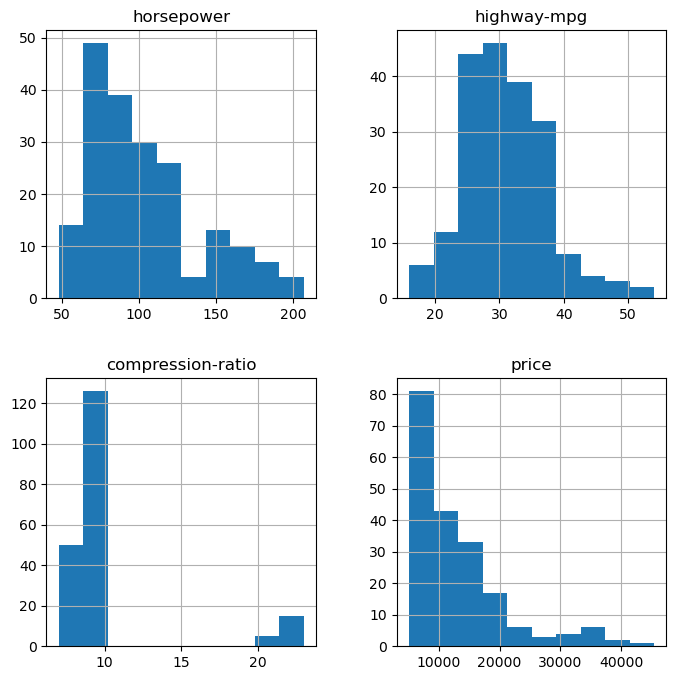

In [112]:
df[['horsepower',
    'highway-mpg',
    'compression-ratio',
    'price']].hist(layout=(2,2),
                     sharex=False,sharey=False,figsize=(8,8))
plt.show()

Aplicando regresión simple, mostrando los coeficientes y escribiendo la ecuación


In [113]:
# Regresion Lineal usando sklearn
from sklearn.linear_model import LinearRegression

# lm es el modelo de regresion lineal
lm = LinearRegression()

x = df[['horsepower']]
y = df['price']


In [114]:
# ajustar el modelo ( calcular b0 y b1 )
lm.fit(x,y)

# coeficiente
b0 = lm.intercept_
b1 = lm.coef_
print("b0:", b0)
print("b1:", b1)

b0: -4879.505989269364
b1: [175.40561198]


$$ \hat{y} = -4879.51 + 175.406x $$

Graficando la ecuación y los residuales

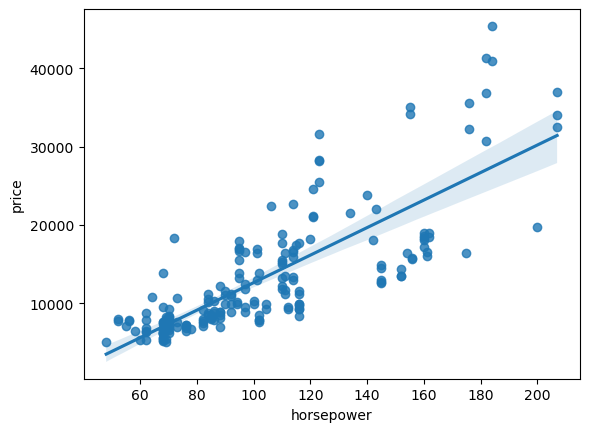

In [115]:
sns.regplot(x='horsepower', y='price', data=df , fit_reg=True)
plt.show()

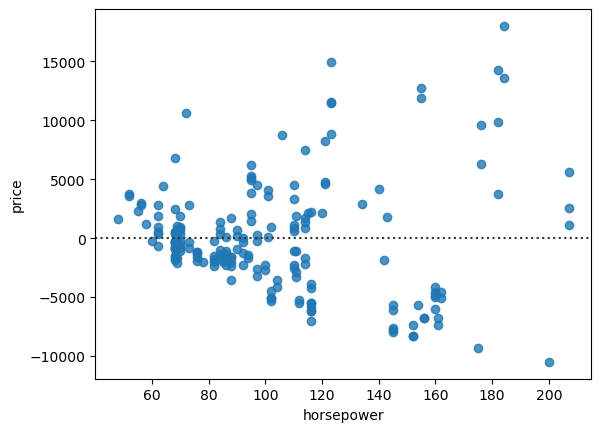

In [116]:
sns.residplot(x='horsepower', y='price', data=df)
plt.show()

### Tarea 
Encontrar el modelo de regresióm simple para las siguiente variables:
- highway-mpg
- compression-ratio


## 2.- Regresión múltiple

#### Ecuación de regresión múltiple

$ y = b_0 + b_1x_1 + b_2x_2 +...+ b_nx_n + error $

$ \hat{y} = b_0 + b_1x_1 + b_2x_2 +...+ b_nx_n $

#### Error
$ y - \hat{y} = error $

#### Concluimos
$ y = \hat{y} + error $


In [117]:
# Seleccionando variables predictoras
# Las variables predictoras se seleccionan en base a la correlacion 
# con la variable 'price'

cdf = df[['horsepower', 'highway-mpg', 'compression-ratio', 'price']]
cdf.head()

,horsepower,highway-mpg,compression-ratio,price
0,111.0,27,9.0,13495.0
1,111.0,27,9.0,16500.0
2,154.0,26,9.0,16500.0
3,102.0,30,10.0,13950.0
4,115.0,22,8.0,17450.0


In [118]:
# Regresion Lineal usando sklearn
from sklearn.linear_model import LinearRegression

# lm es el modelo de regresion lineal
lm = LinearRegression()

X = cdf[['horsepower', 'highway-mpg', 'compression-ratio']]
Y = cdf[['price']]


In [119]:
# Ajustar el modelo ( calcular b0 y b )
lm.fit(X,Y)

# coeficiente
b0 = lm.intercept_
b = lm.coef_
print("b0:", b0)
print("b:", b)

b0: [569.51095815]
b: [[ 148.56282521 -272.35437022  562.36563598]]


$$  \hat{y} =  569.11 +  148.56x_1 -272.35x_2  +562.37x_3 $$

### Graficando los residuales

- $ error = y - \hat{y} $

In [120]:

# Calculo Yhat
Yhat = lm.predict(X)

# Calculo error
error = Y.values - Yhat


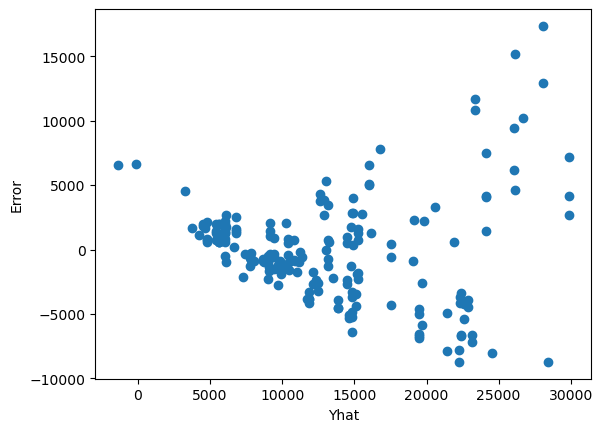

In [121]:
plt.scatter(Yhat, error)
plt.xlabel("Yhat")
plt.ylabel("Error")
plt.show()

In [122]:

## Ejercicio : Realizar un modelo de regresion múltiple con las variables siguientes
# 'curb-weight', 'engine-size', 'highway-mpg' y 'price'




## 3.- Regresión Polinómica

- Cuadrática (segundo orden)
$$ \hat{y} = b_0 + b_1x + b_2x^2 $$

- Cúbica (tercer orden)
$$ \hat{y} = b_0 + b_1x + b_2x^2 + b_3x^3 $$

- Superior (n-ésimo orden)
$$ \hat{y} = b_0 + b_1x + b_2x^2 + b_3x^3 +...+ b_nx^n $$

In [123]:
# Regresion polinomica de grado 2

X = df['highway-mpg']
Y = df['price']
grade = 2

f = np.polyfit(X, Y, grade)

print(f)

[ 4.64524077e+01 -3.87087113e+03  8.62658335e+04]


In [124]:
p = np.poly1d(f)
print(p)

       2
46.45 x - 3871 x + 8.627e+04


$$ \hat{y} = 86265.83 -3870.87x + 4645x^2 $$